# Couple questions

These were 100,000 listings from many different car markers, I wonder if we can find any patterns about these listings.

In [1]:
import pandas as pd
import category_encoders as ce
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import numpy as np

In [2]:
df = pd.read_csv("Resources/vw.csv")

In [3]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
5,T-Roc,2020,31895,Manual,10,Petrol,145,42.2,1.5
6,T-Roc,2020,27895,Manual,10,Petrol,145,42.2,1.5
7,T-Roc,2020,39495,Semi-Auto,10,Petrol,145,32.5,2.0
8,T-Roc,2019,21995,Manual,10,Petrol,145,44.1,1.0
9,T-Roc,2019,23285,Manual,10,Petrol,145,42.2,1.5


In [5]:
df['model'].unique()

array([' T-Roc', ' Golf', ' Passat', ' T-Cross', ' Polo', ' Tiguan',
       ' Sharan', ' Up', ' Scirocco', ' Beetle', ' Caddy Maxi Life',
       ' Caravelle', ' Touareg', ' Arteon', ' Touran', ' Golf SV',
       ' Amarok', ' Tiguan Allspace', ' Shuttle', ' Jetta', ' CC',
       ' California', ' Caddy Life', ' Caddy', ' Caddy Maxi', ' Eos',
       ' Fox'], dtype=object)

In [6]:
df['car age'] = 2020 - df['year']

In [7]:
df.drop(['year'], axis=1, inplace = True)

# Charts

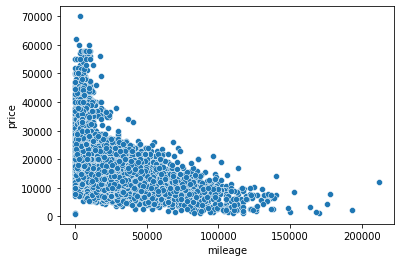

In [8]:
ax = sns.scatterplot(data=df, x="mileage", y="price")

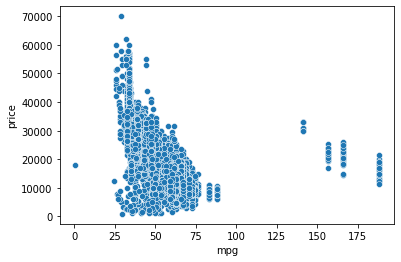

In [9]:
ax = sns.scatterplot(data=df, x="mpg", y="price")

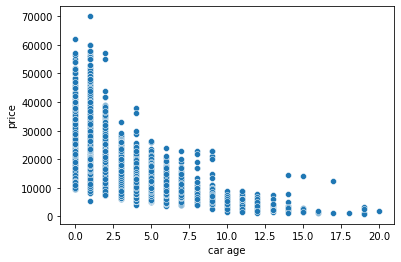

In [10]:
ax = sns.scatterplot(data=df, x="car age", y="price")

In [11]:
df

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,car age
0,T-Roc,25000,Automatic,13904,Diesel,145,49.6,2.0,1
1,T-Roc,26883,Automatic,4562,Diesel,145,49.6,2.0,1
2,T-Roc,20000,Manual,7414,Diesel,145,50.4,2.0,1
3,T-Roc,33492,Automatic,4825,Petrol,145,32.5,2.0,1
4,T-Roc,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,1
...,...,...,...,...,...,...,...,...,...
15152,Eos,5990,Manual,74000,Diesel,125,58.9,2.0,8
15153,Fox,1799,Manual,88102,Petrol,145,46.3,1.2,12
15154,Fox,1590,Manual,70000,Petrol,200,42.0,1.4,11
15155,Fox,1250,Manual,82704,Petrol,150,46.3,1.2,14


In [12]:
grouped_by = df.groupby('transmission').mean()
grouped_by

,price,mileage,tax,mpg,engineSize,car age
transmission,,,,,,
Automatic,22589.528061,18896.150000,142.987245,48.536327,1.905306,2.359694
Manual,13709.165552,24757.289476,99.508336,56.559541,1.449867,3.061485
Semi-Auto,21654.315873,17112.302381,130.037037,49.467513,1.818492,2.153175


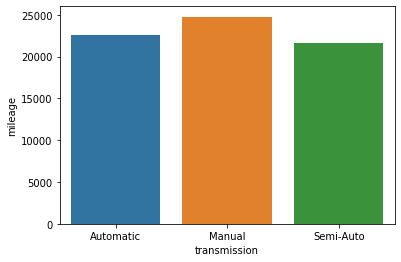

In [13]:
ax = sns.barplot(x=grouped_by.index, y="price", data=grouped_by)

ax = sns.barplot(x=grouped_by.index, y="mileage", data=grouped_by)

# Standard Scaler

In [14]:
encoder= ce.BinaryEncoder(cols=['model', 'fuelType', "transmission"],return_df=True)
df = encoder.fit_transform(df) 

In [15]:
# spliting training and testing data

X = df.loc[:, df.columns != 'price']
y = df['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [17]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [18]:
# Plot the results 
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()

df.head()

# Plots



,model_0,model_1,model_2,model_3,model_4,model_5,price,transmission_0,transmission_1,transmission_2,mileage,fuelType_0,fuelType_1,fuelType_2,tax,mpg,engineSize,car age
0,0,0,0,0,0,1,25000,0,0,1,13904,0,0,1,145,49.6,2.0,1
1,0,0,0,0,0,1,26883,0,0,1,4562,0,0,1,145,49.6,2.0,1
2,0,0,0,0,0,1,20000,0,1,0,7414,0,0,1,145,50.4,2.0,1
3,0,0,0,0,0,1,33492,0,0,1,4825,0,1,0,145,32.5,2.0,1
4,0,0,0,0,0,1,22900,0,1,1,6500,0,1,0,150,39.8,1.5,1


In [19]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
# R^2 of .808!

MSE: 0.18815344296012304, R2: 0.8087524970102447


In [20]:
model.coef_

array([[ 0.00000000e+00,  4.71244547e-03,  1.82609978e-02,
         9.81231916e-02,  4.23842728e-02, -4.26065494e-02,
         1.52655666e-16, -2.89924604e-02,  9.76613808e-02,
        -1.87714320e-01,  2.33912206e-01,  1.54999334e-01,
         1.15887812e-01, -4.58432212e-02, -2.53880901e-01,
         5.09259884e-01, -3.75571503e-01]])

# Import all dataframes

In [21]:
csv_list = os.listdir('Resources/')

In [22]:
holder = []
for csv in csv_list:
    df = pd.read_csv(f"Resources/{csv}")
    df['Maker'] = csv.split('.')[0]
    if "tax(£)" in df.columns:
        df.rename(columns={"tax(£)": "tax"}, inplace = True)
        df['tax'] = df['tax'] * 1.39
    
    if len(df.columns) == 10:
        holder.append(df)

In [23]:
for i in range(len(holder)):
    print(holder[i].columns, len(holder[i].columns))

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Maker'],
      dtype='object') 10
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Maker'],
      dtype='object') 10
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Maker'],
      dtype='object') 10
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Maker'],
      dtype='object') 10
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Maker'],
      dtype='object') 10
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Maker'],
      dtype='object') 10
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Maker'],
      dtype='object') 10
Index(

In [24]:
df = pd.concat(holder)

In [25]:
df['car age'] = 2021 - df['year']

In [26]:
df.drop(['year'], axis = 1, inplace = True)

In [27]:
df.drop(index=17726, inplace = True)

# Analysis

In [28]:
grouped_by = df.groupby('Maker').mean()
grouped_by.head()

,price,mileage,tax,mpg,engineSize,car age
Maker,,,,,,
audi,22896.685039,24827.244001,126.011436,50.770022,1.930709,3.899325
bmw,22733.408867,25496.986550,131.702068,56.399035,2.167767,3.921065
ford,12280.078435,23361.880149,113.329437,57.907832,1.350824,4.135827
hyundi,12750.131070,21486.049588,168.394496,53.827798,1.457922,3.892387
merc,24698.596920,21949.559037,129.972178,55.155843,2.071530,3.703712


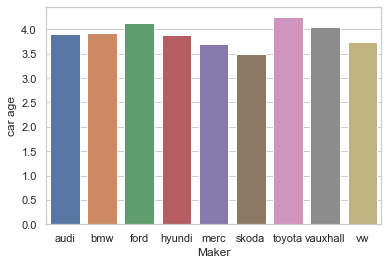

In [29]:
#Looks like the makers all have cars on the market between 3.5-4 years old
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=grouped_by.index, y="car age", data=grouped_by)

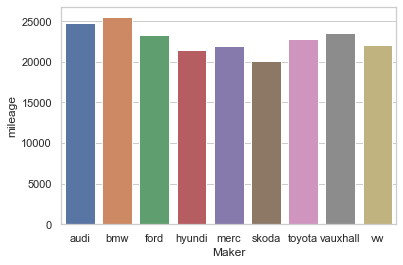

In [30]:
#Looks like the makers all have cars on the market has between 20-25k in mileage
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=grouped_by.index, y="mileage", data=grouped_by)

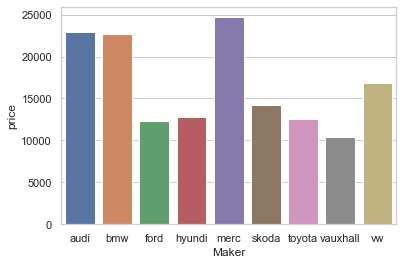

In [31]:
ax = sns.barplot(x=grouped_by.index, y="price", data=grouped_by)

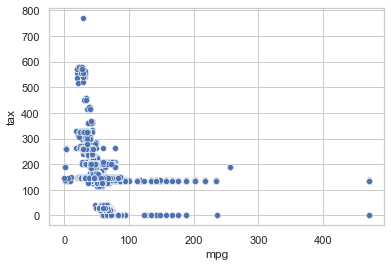

In [32]:
# There might be a correlation between the miles per gallon of these cars and the tax on them
ax = sns.scatterplot(data=df, x="mpg", y="tax")

In [33]:
df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Maker,car age
0,A1,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,4
1,A6,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,5
2,A1,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,5
3,A4,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,4
4,A3,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,2


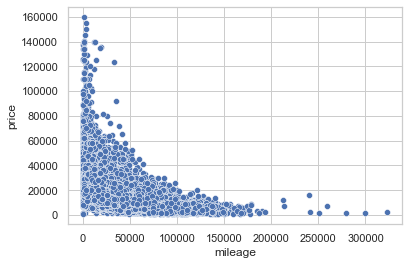

In [34]:
ax = sns.scatterplot(data=df, x="mileage", y="price")

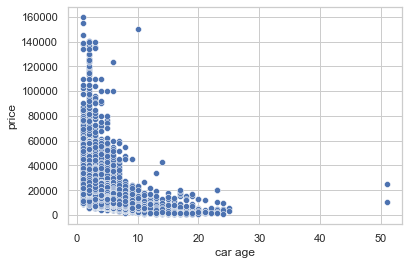

In [35]:
ax = sns.scatterplot(data=df, x="car age", y="price")

In [36]:
grouped_by_fuel = df.groupby('fuelType').mean()

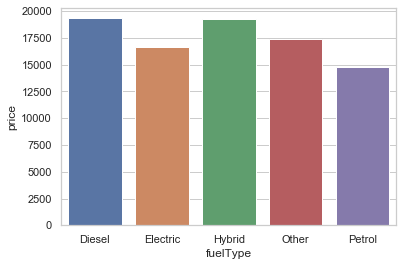

In [37]:
# Petrol seems to be cheaper and Diesel more expensive
ax = sns.barplot(x=grouped_by_fuel.index, y="price", data=grouped_by_fuel)

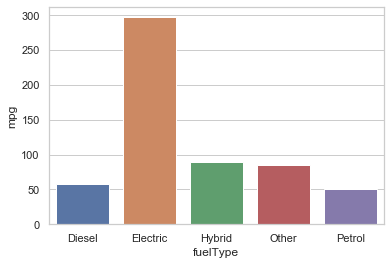

In [38]:
# Naturally Electric had better MPG
ax = sns.barplot(x=grouped_by_fuel.index, y="mpg", data=grouped_by_fuel)

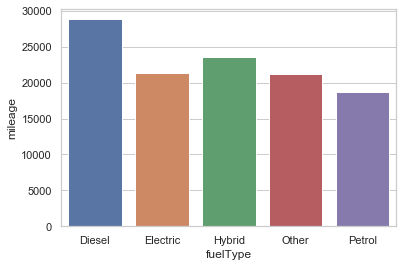

In [39]:
# Petrol has the least amount of mileage while on the market, perhaps they don't like how it's run? Let's look deeper
ax = sns.barplot(x=grouped_by_fuel.index, y="mileage", data=grouped_by_fuel)

In [40]:
petrol_df = df[df['fuelType'] == 'Petrol']
petrol_group_by = petrol_df.groupby(['Maker']).count()
petrol_group_by

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,car age
Maker,,,,,,,,,
audi,5063,5063,5063,5063,5063,5063,5063,5063,5063
bmw,3417,3417,3417,3417,3417,3417,3417,3417,3417
ford,12177,12177,12177,12177,12177,12177,12177,12177,12177
hyundi,2902,2902,2902,2902,2902,2902,2902,2902,2902
merc,3752,3752,3752,3752,3752,3752,3752,3752,3752
skoda,4171,4171,4171,4171,4171,4171,4171,4171,4171
toyota,4087,4087,4087,4087,4087,4087,4087,4087,4087
vauxhall,10805,10805,10805,10805,10805,10805,10805,10805,10805
vw,8553,8553,8553,8553,8553,8553,8553,8553,8553


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Maker')]

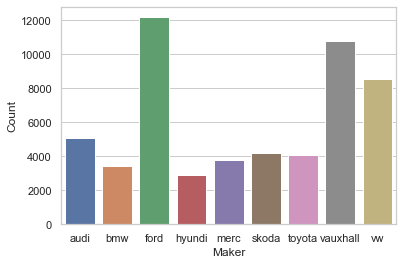

In [41]:
# It looks like Ford and Vauxhall have the most petrol cars on the market, is that all Ford produces?
ax = sns.barplot(x=petrol_group_by.index, y="price", data=petrol_group_by)
ax.set(xlabel='Maker', ylabel='Count')

In [42]:
ford_df = df[df['Maker'] == 'ford']

In [43]:
ford_group_by_df = ford_df.groupby("fuelType").count()

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Fuel Type')]

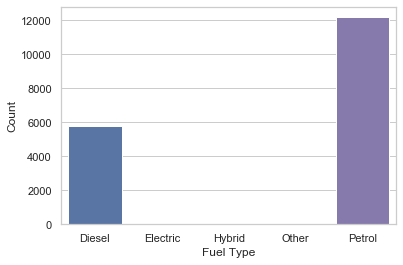

In [44]:
# Heavily!
ax = sns.barplot(x=ford_group_by_df.index, y="price", data=ford_group_by_df)
ax.set(xlabel='Fuel Type', ylabel='Count')

# pre-processing

In [45]:
# df.drop(columns='Maker',inplace = True)
encoder= ce.BinaryEncoder(cols=['model', 'fuelType', "transmission", 'Maker'],return_df=True)
df = encoder.fit_transform(df) 

In [46]:
# spliting training and testing data

X = df.loc[:, df.columns != 'price']
y = df['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [48]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

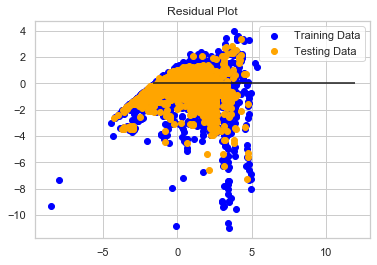

,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,price,...,fuelType_3,tax,mpg,engineSize,Maker_0,Maker_1,Maker_2,Maker_3,Maker_4,car age
0,0,0,0,0,0,0,0,0,1,12500,...,1,150.0,55.4,1.4,0,0,0,0,1,4
1,0,0,0,0,0,0,0,1,0,16500,...,0,20.0,64.2,2.0,0,0,0,0,1,5
2,0,0,0,0,0,0,0,0,1,11000,...,1,30.0,55.4,1.4,0,0,0,0,1,5
3,0,0,0,0,0,0,0,1,1,16800,...,0,145.0,67.3,2.0,0,0,0,0,1,4
4,0,0,0,0,0,0,1,0,0,17300,...,1,145.0,49.6,1.0,0,0,0,0,1,2


In [49]:
# Plot the results 
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

df.head()

# Plots



In [50]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
# R^2 of .77!

MSE: 0.22121676756133596, R2: 0.7732596381718262


# Running OLS

OLS Returning an adjusted R^2 of .938

In [51]:
model = sm.OLS(y,X)
results = model.fit()
results.params

model_0          -6.485911e-09
model_1           2.207628e+03
model_2           1.662842e+03
model_3           2.545519e+03
model_4          -5.215647e+01
model_5           1.148862e+03
model_6           8.794344e+02
model_7           9.446067e+01
model_8           1.998169e+02
transmission_0    4.383674e+03
transmission_1    3.331541e+03
transmission_2    1.525675e+03
mileage          -9.427618e-02
fuelType_0        3.514066e-09
fuelType_1        9.358322e+03
fuelType_2        4.845743e+03
fuelType_3        6.843083e+03
tax              -2.466707e+00
mpg              -2.360162e+01
engineSize        1.090633e+04
Maker_0           1.177355e-09
Maker_1          -7.030147e+03
Maker_2          -3.855581e+03
Maker_3          -3.865642e+03
Maker_4           6.649994e+02
car age          -1.448492e+03
dtype: float64

In [52]:
results.tvalues

model_0            -8.225732
model_1             4.055429
model_2             6.077842
model_3            19.469103
model_4            -0.652995
model_5            25.574204
model_6            23.620392
model_7             2.730582
model_8             6.002783
transmission_0      2.700765
transmission_1     73.051981
transmission_2     33.176048
mileage           -82.704694
fuelType_0          2.679215
fuelType_1         27.414774
fuelType_2         43.492104
fuelType_3         68.243222
tax                -9.127271
mpg               -18.457879
engineSize        283.164147
Maker_0             2.682788
Maker_1           -10.154011
Maker_2           -10.580813
Maker_3           -19.867009
Maker_4             7.301496
car age          -132.239484
dtype: float64

In [53]:
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                          6.489e+04
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                        0.00
Time:                        01:46:25   Log-Likelihood:                     -9.8279e+05
No. Observations:               99186   AIC:                                  1.966e+06
Df Residuals:                   99163   BIC:                                  1.966e+06
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
model_0        -6.486e-09   7.88e-10     -8.226      0.000   -8.03e-09   -4.94e-09
model_1         2207.6278    544.364      4.055      0.000    1140.682    3274.574
model_2         1662.8418    273.591      6.078      0.000    1126.607    2199.076
model_3         2545.5189    130.747     19.469      0.000    2289.257    2801.781
model_4          -52.1565     79.873     -0.653      0.514    -208.706     104.393
model_5         1148.8624     44.923     25.574      0.000    1060.814    1236.910
model_6          879.4344     37.232     23.620      0.000     806.460     952.409
model_7           94.4607     34.594      2.731      0.006      26.658     162.264
model_8          199.8169     33.287      6.003      0.000     134.574     265.060
transmission_0  4383.6744   1623.123      2.701      0.007    1202.373    7564.976
transmission_1  3331.5413     45.605     73.052      0.000    3242.156    3420.927
transmission_2  1525.6749     45.987     33.176      0.000    1435.540    1615.809
mileage           -0.0943      0.001    -82.705      0.000      -0.097      -0.092
fuelType_0      3.514e-09   1.31e-09      2.679      0.007    9.43e-10    6.08e-09
fuelType_1      9358.3223    341.361     27.415      0.000    8689.260       1e+04
fuelType_2      4845.7430    111.417     43.492      0.000    4627.368    5064.118
fuelType_3      6843.0831    100.275     68.243      0.000    6646.545    7039.621
tax               -2.4667      0.270     -9.127      0.000      -2.996      -1.937
mpg              -23.6016      1.279    -18.458      0.000     -26.108     -21.095
engineSize      1.091e+04     38.516    283.164      0.000    1.08e+04     1.1e+04
Maker_0         1.177e-09   4.39e-10      2.683      0.007    3.17e-10    2.04e-09
Maker_1        -7030.1470    692.352    -10.154      0.000   -8387.148   -5673.146
Maker_2        -3855.5812    364.394    -10.581      0.000   -4569.788   -3141.374
Maker_3        -3865.6418    194.576    -19.867      0.000   -4247.008   -3484.275
Maker_4          664.9994     91.077      7.301      0.000     486.489     843.509
car age        -1448.4923     10.954   -132.239      0.000   -1469.961   -1427.024
==============================================================================
Omnibus:                    76412.181   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6057312.609
Skew:                           3.109   Prob(JB):                         0.00
Kurtosis:                      40.776   Cond. No.                     1.00e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
